- Calculate NM pixels
Min: 0.000, Max: 0.467
- Calculate global mean
Mean: 8.867
- Global standard deviation
Standard Deviation: 25.804

Circle: 0 - Center: (308, 298) -     Radius: 139


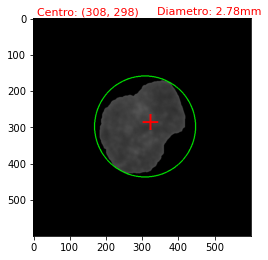

- Calculate NM pixels
Min: 0.000, Max: 0.525
- Calculate global mean
Mean: 5.474
- Global standard deviation
Standard Deviation: 19.438

Circle: 0 - Center: (300, 301) -     Radius: 106


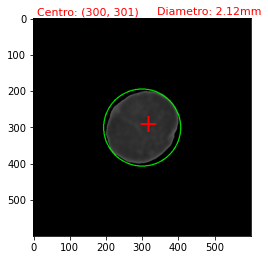

- Calculate NM pixels
Min: 0.000, Max: 0.494
- Calculate global mean
Mean: 4.489
- Global standard deviation
Standard Deviation: 17.409

Circle: 0 - Center: (299, 299) -     Radius: 107


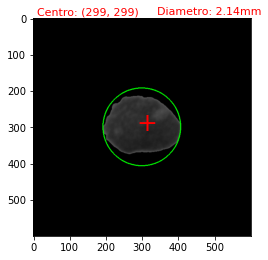

n1 done, size  =  3


In [1]:
#Extract feature from ALL(Acute lymphoblastic leukemia), Leukemias white blood cell image
#Test, Diagonosis as 1

!pip3 install opencv-python
import cv2
from numpy import asarray
from PIL import Image
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

def importing_data(path):
    column_names = ['Max_NM_pixel','Mean_global', 'SD_global','center_x', 'center_y', 'radius', 'diagnosis']
    df_A = pd.DataFrame(columns = column_names)
    columns = list(df_A)
    data = []
    for filename in path:
        # load image
        image = Image.open(filename)
        pixels = asarray(image)
        pixels = pixels.astype('float32')

        # normalize to the range 0-1
        pixelsNM = pixels/255.0
        print('- Calculate NM pixels')
        print('Min: %.3f, Max: %.3f' % (pixelsNM.min(), pixelsNM.max()))
        
        # calculate global mean
        mean = pixels.mean()
        print('- Calculate global mean')
        print('Mean: %.3f' % mean)
        
        # calculate global SD
        std = pixels.std()
        print('- Global standard deviation')
        print('Standard Deviation: %.3f\n' % (std))

        thresh = cv2.imread(filename,0)
        contours,hierarchy = cv2.findContours(thresh,2,1)
        thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
        cnt = contours
        for i in range(len(cnt)):
            (x,y),radius = cv2.minEnclosingCircle(cnt[i])         
            center_x = int(x)
            center_y = int(y)
            radius = int(radius)
            center = (int(x),int(y))
            cv2.circle(thresh,center,radius,(0,255,0),2)
            print ('Circle: ' + str(i) + ' - Center: ' + str(center) + ' -     Radius: ' + str(radius))
            plt.text(x-15, y+10, '+', fontsize=25, color = 'red')
            plt.text(10, -10, 'Centro: '+str(center), fontsize=11, color = 'red')
            plt.text(340, -10, 'Diametro: '+str((radius*2)/100)+'mm', fontsize=11, color = 'red')
            plt.Circle(x, y, color='red', fill=False)
            plt.imshow(thresh, cmap='gray')
            plt.show()
        df1 = [pixelsNM.max(), mean, std, center_x, center_y, radius, 1 ]
        data = pd.Series(df1, index = df_A.columns)
        df_A = df_A.append(data, ignore_index=True)
    return df_A

pathA_test = glob.glob(r'C:\Users\JahManita\Desktop\Leukemia\1_Test\*.bmp')
n1 = importing_data(pathA_test)
#pd.DataFrame(n1).to_csv(r"C:\Users\JahManita\Desktop\Leukemia\test.csv")
pd.DataFrame(n1).to_csv("test.csv") 

#pathA = glob.glob(r'C:\Users\JahManita\Desktop\Leukemia\C-NMC_Leukemia\training_data\all\*.bmp')
#print(n1)
print("n1 done, size  = ", len(n1))
#pd.DataFrame(n1).to_csv(r"C:\Users\JahManita\Desktop\Leukemia\C-NMC_Leukemia\training_data\all.csv")
            

In [2]:
#Extract feature from ALL(Acute lymphoblastic leukemia), Leukemias white blood cell image
#Diagonosis as 1

!pip3 install opencv-python
import cv2
from numpy import asarray
from PIL import Image
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

def importing_data(path):
    column_names = ['Max_NM_pixel','Mean_global', 'SD_global','center_x', 'center_y', 'radius', 'diagnosis']
    df_A = pd.DataFrame(columns = column_names)
    columns = list(df_A)
    data = []
    for filename in path:
        # load image
        image = Image.open(filename)
        pixels = asarray(image)
        pixels = pixels.astype('float32')

        # normalize to the range 0-1
        pixelsNM = pixels/255.0
        #print('- Calculate NM pixels')
        #print('Min: %.3f, Max: %.3f' % (pixelsNM.min(), pixelsNM.max()))
        
        # calculate global mean
        mean = pixels.mean()
        #print('- Calculate global mean')
        #print('Mean: %.3f' % mean)
        
        # calculate global SD
        std = pixels.std()
        #print('- Global standard deviation')
        #print('Standard Deviation: %.3f\n' % (std))

        thresh = cv2.imread(filename,0)
        contours,hierarchy = cv2.findContours(thresh,2,1)
        thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
        cnt = contours
        for i in range(len(cnt)):
            (x,y),radius = cv2.minEnclosingCircle(cnt[i])         
            center_x = int(x)
            center_y = int(y)
            radius = int(radius)
            #center = (int(x),int(y))
            #cv2.circle(thresh,center,radius,(0,255,0),2)
            #print ('Circle: ' + str(i) + ' - Center: ' + str(center) + ' -     Radius: ' + str(radius))
            #plt.text(x-15, y+10, '+', fontsize=25, color = 'red')
            #plt.text(10, -10, 'Centro: '+str(center), fontsize=11, color = 'red')
            #plt.text(340, -10, 'Diametro: '+str((radius*2)/100)+'mm', fontsize=11, color = 'red')
            #plt.Circle(x, y, color='red', fill=False)
            #plt.imshow(thresh, cmap='gray')
            #plt.show()
        df1 = [pixelsNM.max(), mean, std, center_x, center_y, radius, 1 ]
        data = pd.Series(df1, index = df_A.columns)
        df_A = df_A.append(data, ignore_index=True)
    return df_A

#pathA_test = glob.glob(r'C:\Users\JahManita\Desktop\Leukemia\Test\*.bmp')
#n1 = importing_data(pathA_test)
#pd.DataFrame(n1).to_csv(r"C:\Users\JahManita\Desktop\Leukemia\test.csv")

pathA = glob.glob(r'C:\Users\JahManita\Desktop\Leukemia\2_Dataset\all\*.bmp')
n1 = importing_data(pathA)
print("n1 done, size  = ", len(n1))
#pd.DataFrame(n1).to_csv(r"C:\Users\JahManita\Desktop\Leukemia\2_Dataset\all.csv")
pd.DataFrame(n1).to_csv("all.csv") 
print("Done for ALL dataset")

n1 done, size  =  7272
Done for ALL dataset


In [3]:
#Extract feature from HEM (), normal white blood cell image.
#Diagonosis as 0

!pip3 install opencv-python
import cv2
from numpy import asarray
from PIL import Image
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

def importing_data(path):
    column_names = ['Max_NM_pixel','Mean_global', 'SD_global','center_x', 'center_y', 'radius', 'diagnosis']
    df_A = pd.DataFrame(columns = column_names)
    columns = list(df_A)
    data = []
    for filename in path:
        # load image
        image = Image.open(filename)
        pixels = asarray(image)
        pixels = pixels.astype('float32')

        # normalize to the range 0-1
        pixelsNM = pixels/255.0
        #print('- Calculate NM pixels')
        #print('Min: %.3f, Max: %.3f' % (pixelsNM.min(), pixelsNM.max()))
        
        # calculate global mean
        mean = pixels.mean()
        #print('- Calculate global mean')
        #print('Mean: %.3f' % mean)
        
        # calculate global SD
        std = pixels.std()
        #print('- Global standard deviation')
        #print('Standard Deviation: %.3f\n' % (std))

        thresh = cv2.imread(filename,0)
        contours,hierarchy = cv2.findContours(thresh,2,1)
        thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
        cnt = contours
        for i in range(len(cnt)):
            (x,y),radius = cv2.minEnclosingCircle(cnt[i])         
            center_x = int(x)
            center_y = int(y)
            radius = int(radius)
            #print(center_x, center_y, radius,'\n')
        df1 = [pixelsNM.max(), mean, std, center_x, center_y, radius, 0 ]
        data = pd.Series(df1, index = df_A.columns)
        df_A = df_A.append(data, ignore_index=True)
    return df_A

pathH = glob.glob(r'C:\Users\JahManita\Desktop\Leukemia\2_Dataset\hem\*.bmp')

n2 = importing_data(pathH)
print("n2 done, size  = ", len(n2))
#pd.DataFrame(n1).to_csv(r"C:\Users\JahManita\Desktop\Leukemia\2_Dataset\hem.csv")
pd.DataFrame(n2).to_csv("hem.csv")  
print("Done for HEM dataset")

n2 done, size  =  3389
Done for HEM dataset


In [4]:
#Combine dataset between ALL(Leukemias white blood cell) and HEM(normal white blood cell)

import pandas as pd
#df_all = pd.read_csv(r"C:\Users\JahManita\Desktop\Leukemia\2_Dataset\all.csv")
df_all = pd.read_csv("all.csv")
#df_hem = pd.read_csv(r"C:\Users\JahManita\Desktop\Leukemia\2_Dataset\hem.csv")
df_hem = pd.read_csv("hem.csv")
pd.concat([df_all, df_hem]).to_csv('combine.csv', index=False)
print("Done for combine dataset")

Done for combine dataset
